In [47]:
import pandas as pd
import sklearn 
from sklearn import preprocessing
import numpy as np


In [79]:
data = pd.read_csv('/content/titanic_data-F.csv')
data.sample(12)

,x,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
1289,1290,3,0,"Wiklund, Mr. Karl Johan",male,21,1,0,3101266,6.4958,?,S,?
1182,1183,3,1,"Salkjelsvik, Miss. Anna Kristine",female,21,0,0,343120,7.65,?,S,?
329,330,2,1,"Angle, Mrs. William A (Florence 'Mary' Agnes H...",female,36,1,0,226875,26,?,S,"Warwick, England"
890,891,3,0,"Johansson, Mr. Erik",male,22,0,0,350052,7.7958,?,S,?
81,82,1,0,"Crosby, Capt. Edward Gifford",male,70,1,1,WE/P 5735,71,B22,S,"Milwaukee, WI"
1112,1113,3,0,"Peacock, Miss. Treasteall",female,3,1,1,SOTON/O.Q. 3101315,13.775,?,S,?
1151,1152,3,0,"Risien, Mrs. Samuel (Emma)",female,?,0,0,364498,14.5,?,S,?
126,127,1,0,"Futrelle, Mr. Jacques Heath",male,37,1,0,113803,53.1,C123,S,"Scituate, MA"
744,745,3,0,"Dakic, Mr. Branko",male,19,0,0,349228,10.1708,?,S,Austria
283,284,1,0,"Stewart, Mr. Albert A",male,?,0,0,PC 17605,27.7208,?,C,"Gallipolis, Ohio / ? Paris / New York"


# **Cleaning the data**


In [121]:
df = pd.DataFrame(data)

df.drop(['home.dest' , 'name' ,'ticket' , 'cabin'] , axis = 1 , inplace = True)
df.shape


(1309, 9)

In [122]:
df.replace('?' , np.nan , inplace = True)
df = df.dropna()
df.sample(10)


,x,pclass,survived,sex,age,sibsp,parch,fare,embarked
92,93,1,1,female,17,1,0,57,S
911,912,3,0,male,21,0,0,8.4333,S
1113,1114,3,0,female,26,0,2,13.775,S
555,556,2,0,male,25,0,0,13,S
1101,1102,3,0,male,1,4,1,39.6875,S
977,978,3,0,male,20.5,0,0,7.25,S
985,986,3,1,male,24,0,0,7.1417,S
616,617,3,0,male,24,0,0,7.05,S
513,514,2,1,female,14,1,0,30.0708,C
366,367,2,0,male,54,1,0,26,S


In [123]:
label_encoder = preprocessing.LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['embarked'] = label_encoder.fit_transform(df['embarked'])
# df['cabin'] = label_encoder.fit_transform(df['cabin'])
df.sample(10)

,x,pclass,survived,sex,age,sibsp,parch,fare,embarked
50,51,1,1,0,58,0,1,512.3292,0
600,601,3,0,1,42,0,0,7.55,2
791,792,3,0,1,17,1,1,7.2292,0
1183,1184,3,0,1,39,0,0,7.925,2
844,845,3,0,1,28,1,0,15.85,2
974,975,3,0,1,30,1,0,16.1,2
552,553,2,0,1,19,0,0,10.5,2
877,878,3,0,0,27,1,0,7.925,2
1204,1205,3,0,1,21,0,0,7.925,2
1160,1161,3,0,1,50,0,0,8.05,2


In [124]:
#check for missing values
print(df.isna().sum())

x           0
pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


# Creating Train and Test Dataset

In [125]:
X = df.drop("survived",axis=1)
X.head()

,x,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29,0,0,211.3375,2
1,2,1,1,0.9167,1,2,151.55,2
2,3,1,0,2,1,2,151.55,2
3,4,1,1,30,1,2,151.55,2
4,5,1,0,25,1,2,151.55,2


In [126]:
y = df['survived']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [127]:
df.describe()

,x,pclass,survived,sex,sibsp,parch,embarked
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,600.331735,2.209012,0.407478,0.629914,0.504314,0.421860,1.545542
std,364.291510,0.840685,0.491601,0.483059,0.913080,0.840655,0.809366
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,300.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,576.000000,2.000000,0.000000,1.000000,0.000000,0.000000,2.000000
75%,875.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,1309.000000,3.000000,1.000000,1.000000,8.000000,6.000000,2.000000


In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Displays the splitted data count
print("Training dataset shape:", X_train.shape, y_train.shape)
print("Testing dataset shape:", X_test.shape, y_test.shape)

Training dataset shape: (834, 8) (834,)
Testing dataset shape: (209, 8) (209,)


In [129]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.model_selection import train_test_split

clf = DecisionTreeClassifier(random_state=42) 

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7655502392344498
Confusion matrix:
 [[98 20]
 [29 62]]


In [132]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["embarked"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.0, 0.0, 1.0, ..., 0, 0, '211.3375'],
       [0.0, 0.0, 1.0, ..., 1, 2, '151.55'],
       [0.0, 0.0, 1.0, ..., 1, 2, '151.55'],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 0, '7.225'],
       [1.0, 0.0, 0.0, ..., 0, 0, '7.225'],
       [0.0, 0.0, 1.0, ..., 0, 0, '7.875']], dtype=object)

In [133]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,1,1,0,29,0,0,211.3375
1,0.0,0.0,1.0,2,1,1,0.9167,1,2,151.55
2,0.0,0.0,1.0,3,1,0,2,1,2,151.55
3,0.0,0.0,1.0,4,1,1,30,1,2,151.55
4,0.0,0.0,1.0,5,1,0,25,1,2,151.55
...,...,...,...,...,...,...,...,...,...,...
1038,1.0,0.0,0.0,1302,3,1,45.5,0,0,7.225
1039,1.0,0.0,0.0,1305,3,0,14.5,1,0,14.4542
1040,1.0,0.0,0.0,1307,3,1,26.5,0,0,7.225
1041,1.0,0.0,0.0,1308,3,1,27,0,0,7.225


In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import random

random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y,
                                                    test_size=0.2)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

# print("Prediction: ",y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7464114832535885
Confusion matrix:
 [[98 16]
 [37 58]]


In [141]:
cr = classification_report(y_test , y_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.73      0.86      0.79       114
           1       0.78      0.61      0.69        95

    accuracy                           0.75       209
   macro avg       0.75      0.74      0.74       209
weighted avg       0.75      0.75      0.74       209



[Text(0.39623397435897434, 0.9375, 'x[5] <= 0.5\ngini = 0.478\nsamples = 834\nvalue = [504, 330]'),
 Text(0.1987179487179487, 0.8125, 'x[3] <= 609.5\ngini = 0.38\nsamples = 310\nvalue = [79, 231]'),
 Text(0.057692307692307696, 0.6875, 'x[3] <= 6.0\ngini = 0.12\nsamples = 187\nvalue = [12, 175]'),
 Text(0.02564102564102564, 0.5625, 'x[8] <= 1.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.01282051282051282, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.038461538461538464, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08974358974358974, 0.5625, 'x[9] <= 26.125\ngini = 0.103\nsamples = 184\nvalue = [10, 174]'),
 Text(0.0641025641025641, 0.4375, 'x[6] <= 56.0\ngini = 0.236\nsamples = 66\nvalue = [9, 57]'),
 Text(0.05128205128205128, 0.3125, 'x[3] <= 479.5\ngini = 0.195\nsamples = 64\nvalue = [7, 57]'),
 Text(0.02564102564102564, 0.1875, 'x[3] <= 468.5\ngini = 0.328\nsamples = 29\nvalue = [6, 23]'),
 Text(0.01282051282051282, 0.0625, '\n  (...)  \n'),
 T

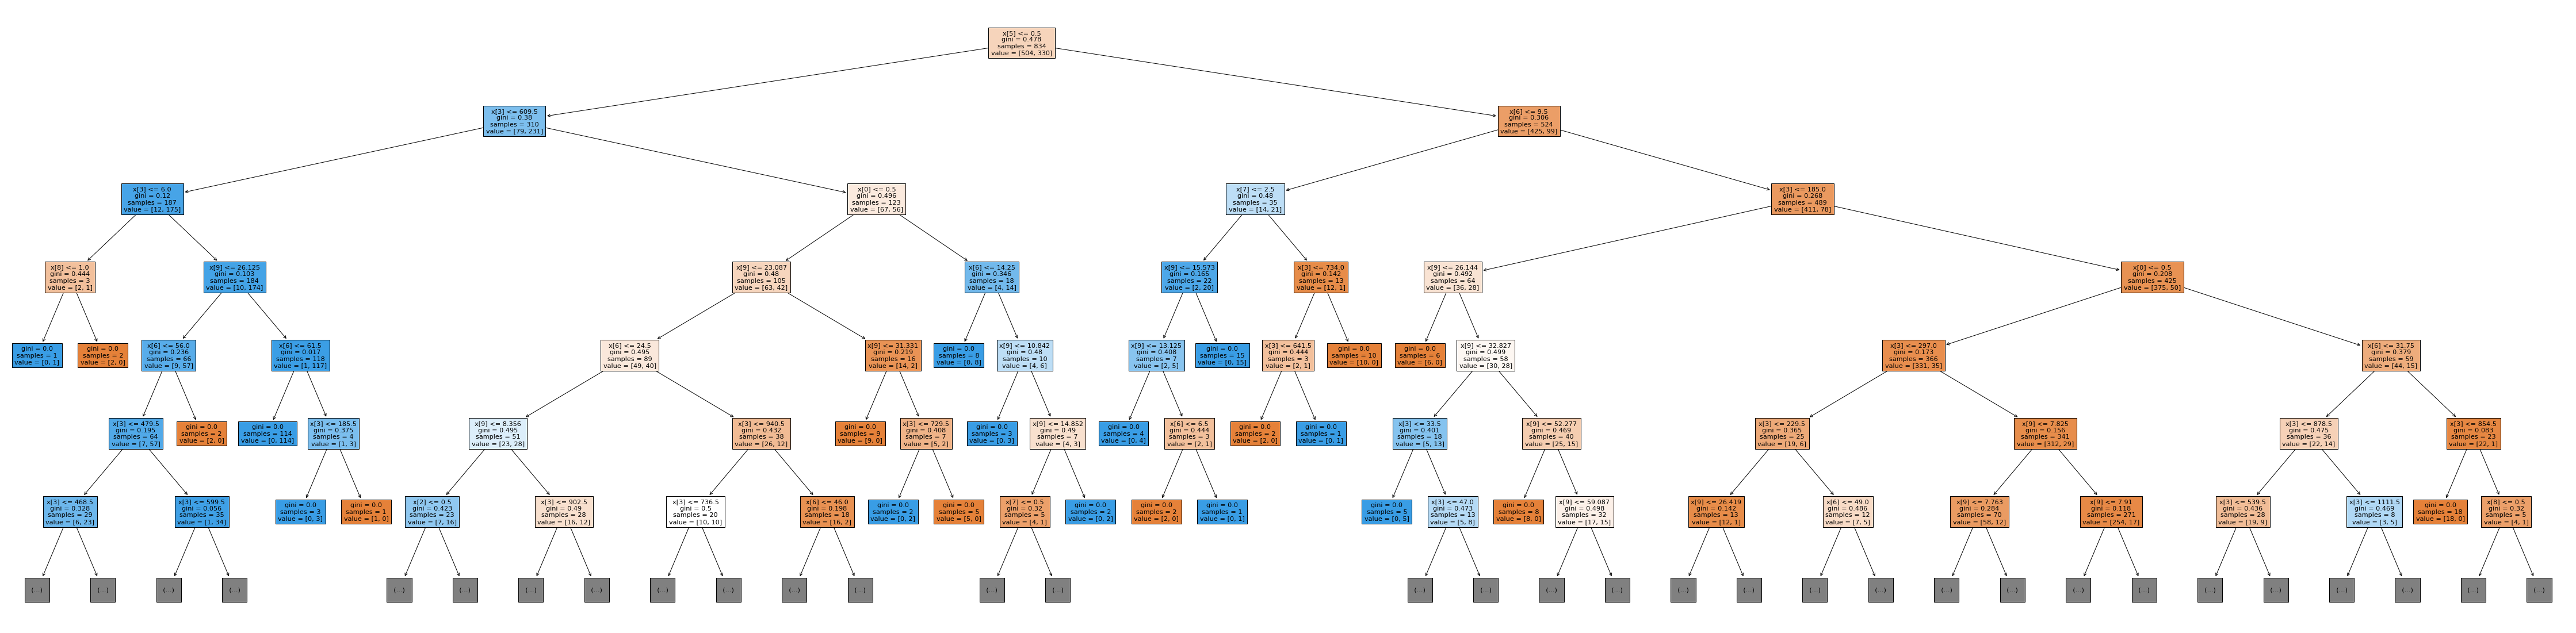

In [161]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Plot the decision tree
#plt.figure(figsize=(20,10))
#plot_tree(clf, filled=True, rounded=True, feature_names=X.columns, class_names=['survived']plt.show()
from sklearn.tree import plot_tree
plt.figure(figsize =(80,20))
plot_tree(clf,max_depth=6, filled=True)

In [157]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score, confusion_matrix, ConfusionMatrixDisplay , RocCurveDisplay 
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test,name="Actual"),pd.Series(y_pred,name="Predicted")))
def get_metrics(y_test,y_pred):
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average="weighted")
    sensitivity = recall_score(y_test , y_pred)
    specificity = recall_score(np.logical_not(y_test) , np.logical_not(y_pred))
    f1 = f1_score(y_test,y_pred)
    return accuracy , precision , sensitivity , specificity , f1
acuracy,precision,sensitivity,specificity , f1 = get_metrics(y_test,y_pred)
print("accuracy = %.3f \nprecision = %.3f\nsensitivity = %.3f\nspecificity = %.3f\nf1 score = %.3f" % (acuracy,precision,sensitivity,specificity,f1))

Confusion matrix

Predicted   0  1
Actual          
0          10  3
1          18  7
accuracy = 0.746 
precision = 0.752
sensitivity = 0.611
specificity = 0.860
f1 score = 0.686


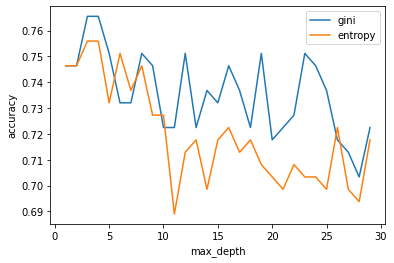

In [158]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [169]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=6)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
accuracy_score(y_test, pred)
#Accuracy: 0.74 for depth 6

0.7559808612440191